## Week 11 Homework (9)

### Q1: copulas

1. ~~Use the example copula code below to provide posterior inference on the dependency structure between for **your own non normally distributed data that you find**~~
2. Repeat the exercise using instead a two pass approach in the manner of https://www.pymc.io/projects/examples/en/latest/howto/copula-estimation.html
3. Describe what a copula is and how the two verions of code implement it
4. Describe how to use this to create arbitrary multivariate GLM regressions

#### Provided example copula code

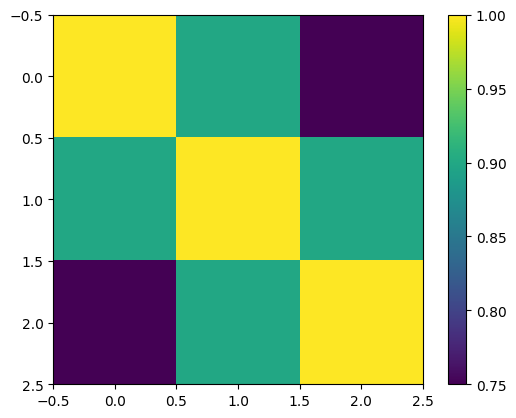

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

p = 3
#Psi = np.eye(p)
#a_cov = stats.invwishart(df=p+2, scale=Psi).rvs()
a_cor = (np.ones((p,p))*9+np.diag((1,1,1)))/10
a_cor[0,-1] -= 0.15
a_cor[-1,0] -= 0.15

n = 100
x = stats.multivariate_normal(mean=np.zeros(p), cov=a_cor).rvs(size=n)
plt.imshow(a_cor)
plt.colorbar();


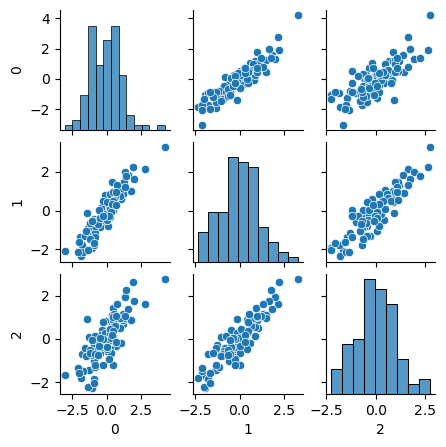

In [ ]:
import seaborn
import pandas as pd
seaborn.pairplot(pd.DataFrame(x),height=1.5);

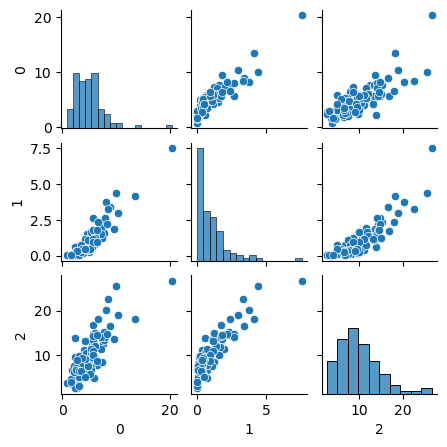

In [ ]:
y = x.copy()
y[:,0] = stats.gamma(a=5).ppf(stats.norm().cdf(x[:,0]))
y[:,1] = stats.expon(scale=1).ppf(stats.norm().cdf(x[:,1]))
y[:,2] = stats.chi2(df=10).ppf(stats.norm().cdf(x[:,2]))

seaborn.pairplot(pd.DataFrame(y),height=1.5);

In [ ]:
import pymc as pm
import arviz as az

with pm.Model() as copula:

    p0 = pm.HalfNormal('p0', sigma=10)
    y0 = pm.Gamma('y0', alpha=p0, beta=1, observed=y[:,0:1])
    y0_ = pm.Deterministic('y0_',
            pm.Normal.icdf(
               pm.math.exp(pm.Gamma.logcdf(y0, alpha=p0, inv_beta=1)),
                           mu=0, sigma=1))

    p1 = pm.HalfNormal('p1', sigma=10)
    y1 = pm.Exponential('y1', lam=p1, observed=y[:,1:2])
    y1_ = pm.Deterministic('y1_',
            pm.Normal.icdf(
               pm.math.exp(pm.Exponential.logcdf(y1, mu=p1)),
                           mu=0, sigma=1))

    p2 = pm.HalfNormal('p2', sigma=10)
    y2 = pm.ChiSquared('y2', nu=p2, observed=y[:,2:3])
    y2_ = pm.Deterministic('y2_',
            pm.Normal.icdf(
               pm.math.exp(pm.ChiSquared.logcdf(y2, nu=p2)),
                           mu=0, sigma=1))

    L,R,stds = pm.LKJCholeskyCov("R", n=3, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=3),
                                 compute_corr=True)

    potential = pm.Potential("MVNeval",
                             pm.logp(pm.MvNormal.dist(mu=0, cov=R),
                             pm.math.concatenate([y0_,y1_,y2_], axis=1)))

    idata = pm.sample()

# This probally produces a lot of warnings but it will run and provide inference


<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] ... [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1960, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] ... [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1960, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] ... [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1960, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] ... [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1960, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] ... [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1960, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] ... [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1960, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] ... [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1960, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] ... [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1960, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] ... [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1960, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] ... [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1960, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:691: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:691: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:691: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p0, p1, p2, R]


/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:691: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:691: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:691: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:691: UserWarning: Optimization Warning: The Op erfcinv does not

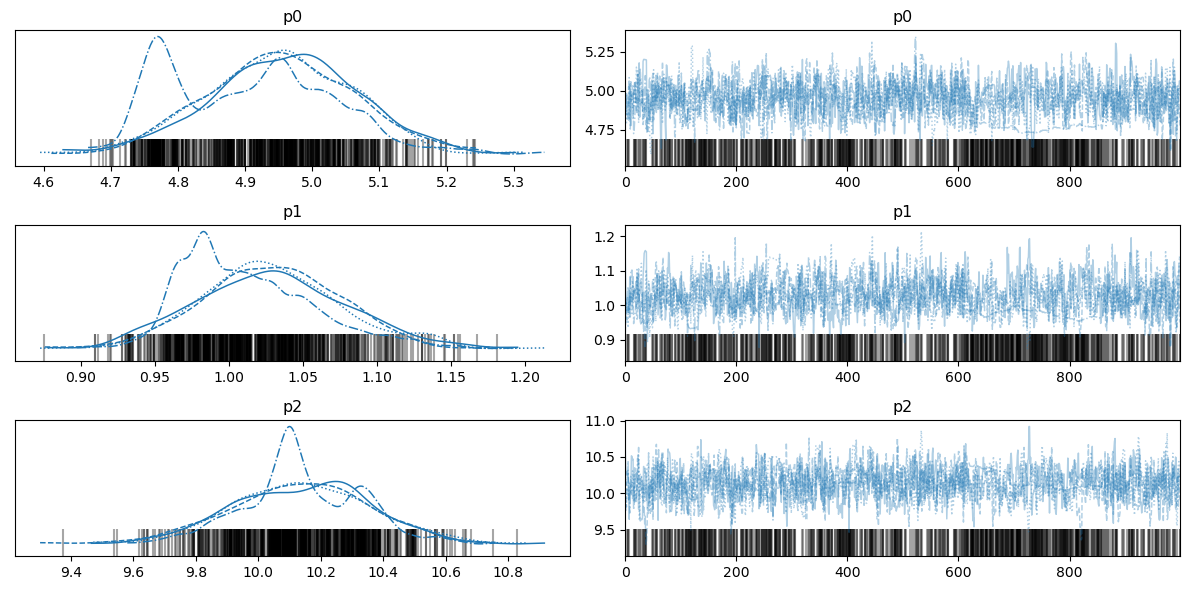

In [ ]:
# Estimation is essentially correct
az.plot_trace(idata, var_names=['p0','p1','p2'])
plt.tight_layout()

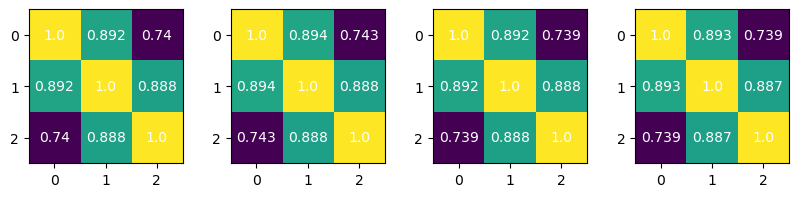

In [ ]:
# Estimation is essentially correct
fig,ax = plt.subplots(1,4,figsize=(10,2))
for i,c in enumerate(list(idata.posterior['R_corr'].values.mean(axis=1))):
    ax[i].imshow(c)
    for k in range(3):
        for j in range(3):
            ax[i].text(j,k,s=str(round(c[j,k],3)),
                       color='w', va='center', ha='center')

#### Solutions to subquestion 2 to 4

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as st
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt


In [21]:
cars = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv")
print(cars.head())

# Define Predictors and Outcomes
predictors = ["cyl", "disp", "wt", "gear"]
X = cars[predictors].values  # shape: (n, p)

# Define two responses: mpg (miles per gallon) and hp (horsepower)
Y = cars[["mpg", "hp"]].values  # shape: (n, 2)
n, p = X.shape
print(f"Number of observations: {n}, Number of predictors: {p}")


        mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb  fast  \
0  4.582576    6  160.0  110  3.90  2.620  16.46   0   1     4     4     1   
1  4.582576    6  160.0  110  3.90  2.875  17.02   0   1     4     4     1   
2  4.774935    4  108.0   93  3.85  2.320  18.61   1   1     4     1     1   
3  4.626013    6  258.0  110  3.08  3.215  19.44   1   0     3     1     1   
4  4.324350    8  360.0  175  3.15  3.440  17.02   0   0     3     2     1   

                cars            carname  
0          Mazda RX4          Mazda RX4  
1      Mazda RX4 Wag      Mazda RX4 Wag  
2         Datsun 710         Datsun 710  
3     Hornet 4 Drive     Hornet 4 Drive  
4  Hornet Sportabout  Hornet Sportabout  
Number of observations: 32, Number of predictors: 4


Output()

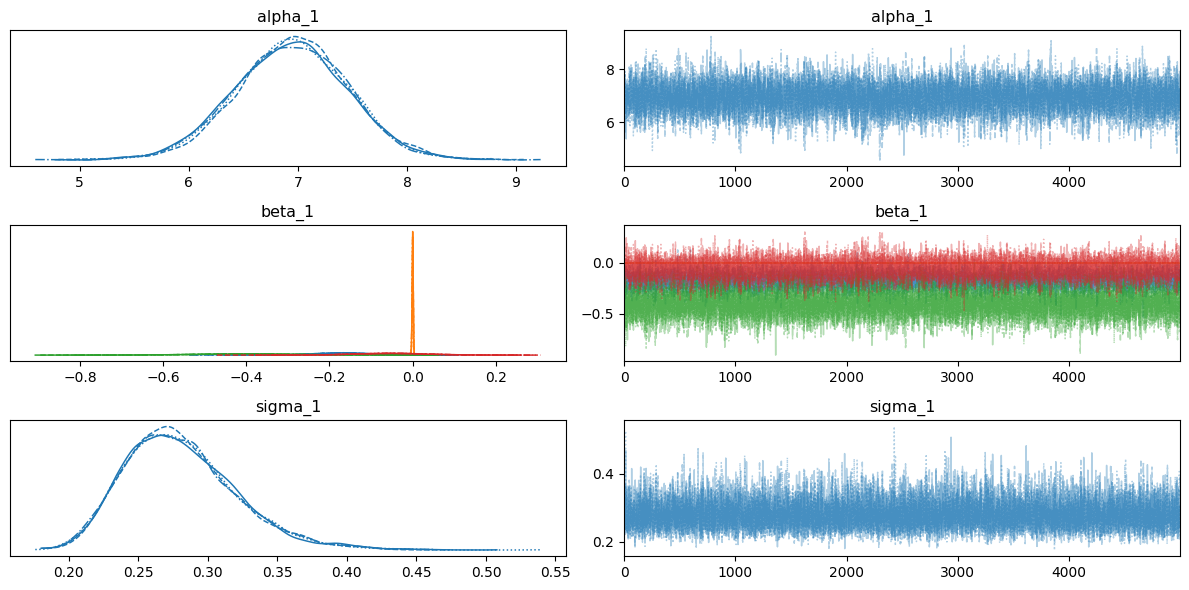

Output()

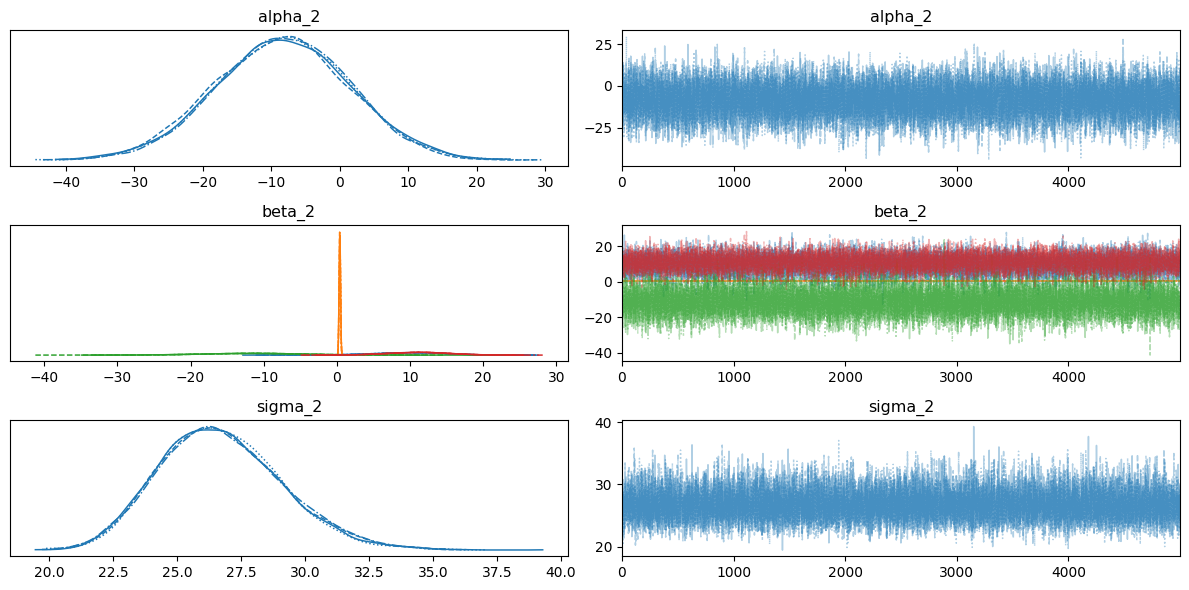

In [22]:
# FIRST PASS: Marginal Models

# Marginal Model for y1 = mpg
y1 = Y[:, 0]  # mpg

with pm.Model() as model_mpg:
    # Priors for regression coefficients for mpg
    alpha_1 = pm.Normal("alpha_1", mu=0, sigma=10)
    beta_1 = pm.Normal("beta_1", mu=0, sigma=10, shape=p)
    sigma_1 = pm.Exponential("sigma_1", 1.0)

    # Linear predictor and likelihood for mpg
    mu_1 = alpha_1 + pm.math.dot(X, beta_1)
    likelihood_mpg = pm.Normal("likelihood_mpg", mu=mu_1, sigma=sigma_1, observed=y1)

    # Sample from the posterior
    trace_mpg = pm.sample(draws=5000, tune=1000, chains=4, target_accept=0.9, return_inferencedata=True)

az.summary(trace_mpg, var_names=["alpha_1", "beta_1", "sigma_1"])
az.plot_trace(trace_mpg, var_names=["alpha_1", "beta_1", "sigma_1"])
plt.tight_layout()
plt.show()

# Marginal Model for y2 = hp
y2 = Y[:, 1]  # hp

with pm.Model() as model_hp:
    alpha_2 = pm.Normal("alpha_2", mu=0, sigma=10)
    beta_2 = pm.Normal("beta_2", mu=0, sigma=10, shape=p)
    sigma_2 = pm.Exponential("sigma_2", 1.0)

    mu_2 = alpha_2 + pm.math.dot(X, beta_2)
    likelihood_hp = pm.Normal("likelihood_hp", mu=mu_2, sigma=sigma_2, observed=y2)

    trace_hp = pm.sample(draws=5000, tune=1000, chains=4, target_accept=0.9, return_inferencedata=True)

az.summary(trace_hp, var_names=["alpha_2", "beta_2", "sigma_2"])
az.plot_trace(trace_hp, var_names=["alpha_2", "beta_2", "sigma_2"])
plt.tight_layout()
plt.show()



The marginal model for mpg shows posterior traces for $alpha_1$, $\beta_1$, and $\sigma_1$. The density plots (left subpanels) and time‐series traces (right subpanels) indicate that the sampler mixed well for these parameters, with no obvious divergences and stable chains converging around a consistent mean. The marginal model for hp  shows a similar pattern for $\alpha_2$, $\beta_2$, and $\sigma_2$. Again, the chains appear stable, suggesting that each parameter converged to a well‐defined posterior distribution without major sampling difficulties.

In [23]:
# Transform Observed Data to Uniform Scale (U-space)

# Extract posterior means from the marginal models
alpha_1_mean = trace_mpg.posterior["alpha_1"].mean().values
beta_1_mean  = trace_mpg.posterior["beta_1"].mean(dim=("chain", "draw")).values
sigma_1_mean = trace_mpg.posterior["sigma_1"].mean().values

alpha_2_mean = trace_hp.posterior["alpha_2"].mean().values
beta_2_mean  = trace_hp.posterior["beta_2"].mean(dim=("chain", "draw")).values
sigma_2_mean = trace_hp.posterior["sigma_2"].mean().values

# Compute predicted means for each observation using the marginal model estimates
mu_1_hat = alpha_1_mean + X.dot(beta_1_mean)
mu_2_hat = alpha_2_mean + X.dot(beta_2_mean)

# Transform observed responses to the uniform scale using the Normal CDF
u1 = st.norm.cdf(y1, loc=mu_1_hat, scale=sigma_1_mean)
u2 = st.norm.cdf(y2, loc=mu_2_hat, scale=sigma_2_mean)

# Stack the uniform variables into an (n, 2) array
U = np.column_stack((u1, u2))

# Clip U to avoid values of exactly 0 or 1 (which cause issues with the inverse CDF)
U_clipped = np.clip(U, 1e-6, 1-1e-6)


In [24]:
# SECOND PASS: Fit a Gaussian Copula to the U Data
with pm.Model() as copula_model:
    rho = pm.Uniform("rho", lower=-1, upper=1)
    cov = pm.math.stack([[1, rho], [rho, 1]])

    z = pm.MvNormal("z", mu=[0, 0], cov=cov, shape=(n, 2))

    u_sim = pm.Deterministic("u_sim", pm.math.invprobit(z))

    z_obs = pm.Normal("z_obs", mu=0, sigma=1, observed=st.norm.ppf(U_clipped))

    # Sample from the posterior of the copula model
    trace_copula = pm.sample(draws=5000, tune=2000, chains=4, target_accept=0.95)



Output()

ERROR:pymc.stats.convergence:There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


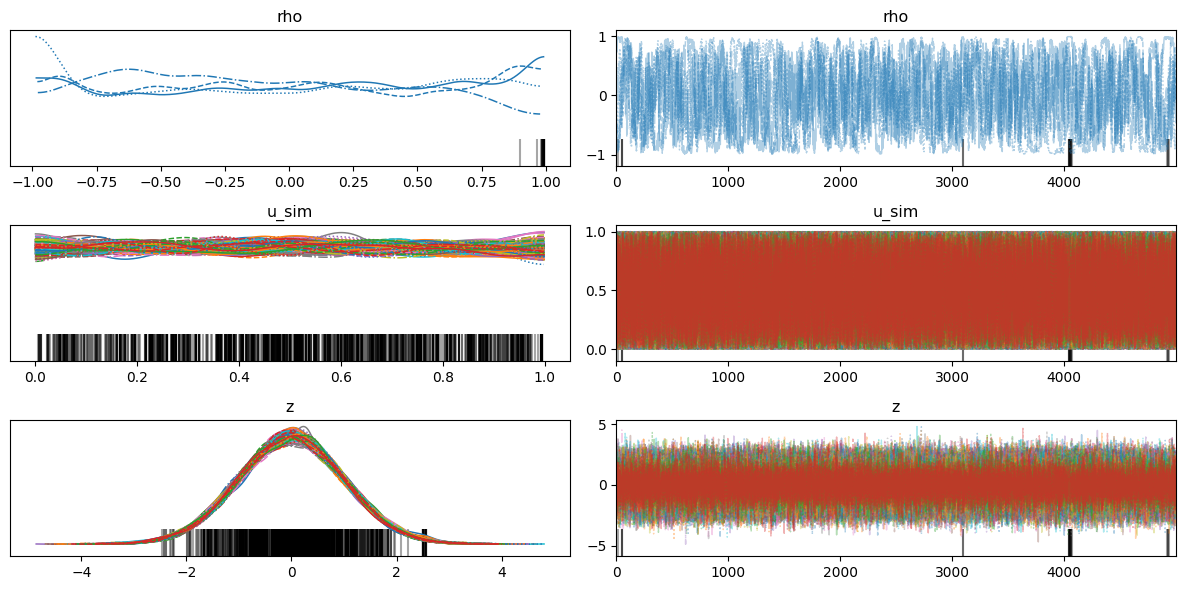

In [25]:
az.summary(trace_copula, var_names=["rho", "u_sim", "z"])
az.plot_trace(trace_copula, var_names=["rho", "u_sim", "z"])
plt.tight_layout()
plt.show()

 The **copula model** (bottom) includes the correlation parameter $\rho$ for the Gaussian copula, the latent normal variables $\mathbf{z}$, and the simulated uniform variables $u_{\text{sim}}$. The trace for $\rho$ (top row) reflects how the sampler explored values from about $-1$ to $1$ before settling around a particular range, while $\mathbf{z}$ and $u_{\text{sim}}$ confirm how each observation’s latent and uniform values evolve. Overall, the copula trace plots also appear relatively well‐mixed, showing that the sampler found a coherent posterior for the correlation structure once the marginals were accounted for.

### 3. What is a Copula and How Do the Two Versions of Code Implement It?

A copula is a function that allows you to separate the modeling of marginal distributions from the modeling of their dependence structure. One can:
- Model each variable’s marginal behavior using any appropriate distribution (gamma, exponential, chi‐squared, etc.),
- Capture the dependency between variables using a copula that “couples” these marginals together.  


**How Do the Two Versions of the Code Implement a Copula?**

1. **Single-Pass Approach:**
Each marginal is modeled with its own likelihood with parameters estimated from the data. Then, each observed variable is transformed back to a standard normal space using the inverse CDF of the normal distribution. This yields variables (e.g., `y0_`, `y1_`, `y2_`) that are on a common scale and can be assumed to have a joint multivariate normal dependency structure. An LKJ Cholesky covariance prior (`pm.LKJCholeskyCov`) is used to define a correlation matrix $ R $. Finally, a joint likelihood is built via a multivariate normal distribution (using `pm.MvNormal.dist`) evaluated on the transformed data, capturing the dependency structure.
     
2. **Two-Pass Approach from PyMC:**

   - **First Pass – Estimating the Marginals:**  
     In a two-pass approach, you would first fit individual models for each variable (their GLM or likelihood function) and obtain estimates of their parameters. Then, you compute the CDF values for each observation.
     
   - **Second Pass – Fitting the Copula:**  
     With the estimated marginal CDF values in hand, you transform them to standard normal quantiles using the inverse normal CDF. Then, you fit a second model—a copula model—to these transformed values to estimate the correlation matrix.
     
**Difference in Implementation:**  
     The single-pass method estimates the marginal parameters and the dependency parameters simultaneously in one hierarchical model. In contrast, the two-pass approach separates these into two distinct steps, simplifying computation and allowing more flexibility if the marginal models are complex.



### 4. Using Copulas to Create Arbitrary Multivariate GLM Regressions
GLMs generally assume that the outcomes are independent, but a copula can be used to model the dependence between them. The idea is to first build a separate GLM for each response $y_i$ by specifying a linear predictor, for instance,  

$
\eta_i = \alpha_i + X\beta,
$

and then relating the mean response $\mu_i$ to $\eta_i$ via a link function (so that $g(\mu_i) = \eta_i$). Each marginal model produces its own distribution $F_i(y_i)$. By applying the CDF of each marginal distribution, we transform the observed values into uniform variables $u_i = F_i(y_i)$, which—if the models are correctly specified—follow a Uniform$[0,1]$ distribution. A copula is then chosen to “couple” these uniform marginals together by introducing parameters that capture their dependence. In the end, the joint likelihood is obtained by combining the marginal likelihoods with the density of the copula, allowing us to simultaneously estimate the parameters for each GLM and the dependence structure among the responses.

### Q2: Variable Selection using Spike and Slab

Perform multivarite regression (or multivariate probit classification) with spike and slab variable selection priors and compare inference to analagous inference with diffuse normal priors (imposing minimal L2 style regularization on the likelihood).

You may artificially limit the size of your data to reduce the computational demands, but if you do so, discuss the behavior of the computational demands with respect to the number of observations $n$, the number of random variables $m$ making up the multivariate observations, and the number of columns of the design matrix $p$.



In [4]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [2]:

# Load the mtcars dataset from a public URL
mtcars = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv")
print(mtcars.head())

# Define response variables: 'mpg' and 'hp'
y_mpg = mtcars["mpg"].values
y_hp = mtcars["hp"].values

# Define predictors:
# Drop response variables and non-numeric columns ("carname" and "cars") from predictors.
predictors = mtcars.drop(columns=["mpg", "hp", "carname", "cars"])
# Standardize predictors (center and scale)
X = (predictors - predictors.mean()) / predictors.std()
X = X.values
n, p = X.shape
print(f"Number of observations: {n}, Number of predictors: {p}")

# Spike-and-Slab Models for Variable Selection #

# --- Spike-and-Slab for mpg ---
with pm.Model() as model_mpg_spike_slab:
    # Latent inclusion indicators for each predictor
    gamma_mpg = pm.Bernoulli("gamma_mpg", p=0.5, shape=p)

    # Spike and slab priors: very tight spike and diffuse slab
    sigma_spike = 0.01
    sigma_slab = 10.0
    beta_spike = pm.Normal("beta_spike_mpg", mu=0, sigma=sigma_spike, shape=p)
    beta_slab = pm.Normal("beta_slab_mpg", mu=0, sigma=sigma_slab, shape=p)

    beta_mpg = pm.Deterministic("beta_mpg", gamma_mpg * beta_slab + (1 - gamma_mpg) * beta_spike)

    alpha_mpg = pm.Normal("alpha_mpg", mu=0, sigma=10)
    sigma_mpg = pm.Exponential("sigma_mpg", 1.0)

    mu_mpg = alpha_mpg + pm.math.dot(X, beta_mpg)
    y_obs_mpg = pm.Normal("y_mpg", mu=mu_mpg, sigma=sigma_mpg, observed=y_mpg)

    trace_mpg_spike = pm.sample(draws=5000, tune=1000, chains=4, target_accept=0.95,
                                return_inferencedata=True)

# --- Spike-and-Slab for hp ---
with pm.Model() as model_hp_spike_slab:
    gamma_hp = pm.Bernoulli("gamma_hp", p=0.5, shape=p)
    sigma_spike = 0.01
    sigma_slab = 10.0
    beta_spike = pm.Normal("beta_spike_hp", mu=0, sigma=sigma_spike, shape=p)
    beta_slab = pm.Normal("beta_slab_hp", mu=0, sigma=sigma_slab, shape=p)
    beta_hp = pm.Deterministic("beta_hp", gamma_hp * beta_slab + (1 - gamma_hp) * beta_spike)

    alpha_hp = pm.Normal("alpha_hp", mu=0, sigma=10)
    sigma_hp = pm.Exponential("sigma_hp", 1.0)

    mu_hp = alpha_hp + pm.math.dot(X, beta_hp)
    y_obs_hp = pm.Normal("y_hp", mu=mu_hp, sigma=sigma_hp, observed=y_hp)

    trace_hp_spike = pm.sample(draws=5000, tune=1000, chains=4, target_accept=0.95,
                               return_inferencedata=True)

# Posterior inclusion probabilities for mpg
gamma_mpg_mean = trace_mpg_spike.posterior["gamma_mpg"].mean(dim=("chain", "draw")).values
predictor_names = predictors.columns
inclusion_probs_mpg = pd.DataFrame({
    "Predictor": predictor_names,
    "Inclusion Probability": gamma_mpg_mean
})
print("Spike-and-Slab: Inclusion Probabilities for mpg:")
print(inclusion_probs_mpg)

# Posterior inclusion probabilities for hp
gamma_hp_mean = trace_hp_spike.posterior["gamma_hp"].mean(dim=("chain", "draw")).values
inclusion_probs_hp = pd.DataFrame({
    "Predictor": predictor_names,
    "Inclusion Probability": gamma_hp_mean
})
print("Spike-and-Slab: Inclusion Probabilities for hp:")
print(inclusion_probs_hp)


# Diffuse Normal Priors (Minimal L2 Reg) #

# --- Diffuse Prior Model for mpg ---
with pm.Model() as model_mpg_diffuse:
    beta_mpg_diffuse = pm.Normal("beta_mpg", mu=0, sigma=10, shape=p)
    alpha_mpg_diffuse = pm.Normal("alpha_mpg", mu=0, sigma=10)
    sigma_mpg_diffuse = pm.Exponential("sigma_mpg", 1.0)

    mu_mpg_diffuse = alpha_mpg_diffuse + pm.math.dot(X, beta_mpg_diffuse)
    y_obs_mpg_diffuse = pm.Normal("y_mpg", mu=mu_mpg_diffuse, sigma=sigma_mpg_diffuse, observed=y_mpg)

    trace_mpg_diffuse = pm.sample(draws=5000, tune=2000, chains=4, target_accept=0.95,
                                  return_inferencedata=True)


# --- Diffuse Prior Model for hp ---
with pm.Model() as model_hp_diffuse:
    beta_hp_diffuse = pm.Normal("beta_hp", mu=0, sigma=10, shape=p)
    alpha_hp_diffuse = pm.Normal("alpha_hp", mu=0, sigma=10)
    sigma_hp_diffuse = pm.Exponential("sigma_hp", 1.0)

    mu_hp_diffuse = alpha_hp_diffuse + pm.math.dot(X, beta_hp_diffuse)
    y_obs_hp_diffuse = pm.Normal("y_hp", mu=mu_hp_diffuse, sigma=sigma_hp_diffuse, observed=y_hp)

    trace_hp_diffuse = pm.sample(draws=5000, tune=2000, chains=4, target_accept=0.95,
                                  return_inferencedata=True)

# Summaries for diffuse prior models
summary_mpg_diffuse = az.summary(trace_mpg_diffuse, var_names=["beta_mpg", "alpha_mpg", "sigma_mpg"])
print("Diffuse Prior: Posterior Summary for mpg Coefficients:")
print(summary_mpg_diffuse)

summary_hp_diffuse = az.summary(trace_hp_diffuse, var_names=["beta_hp", "alpha_hp", "sigma_hp"])
print("Diffuse Prior: Posterior Summary for hp Coefficients:")
print(summary_hp_diffuse)




        mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb  fast  \
0  4.582576    6  160.0  110  3.90  2.620  16.46   0   1     4     4     1   
1  4.582576    6  160.0  110  3.90  2.875  17.02   0   1     4     4     1   
2  4.774935    4  108.0   93  3.85  2.320  18.61   1   1     4     1     1   
3  4.626013    6  258.0  110  3.08  3.215  19.44   1   0     3     1     1   
4  4.324350    8  360.0  175  3.15  3.440  17.02   0   0     3     2     1   

                cars            carname  
0          Mazda RX4          Mazda RX4  
1      Mazda RX4 Wag      Mazda RX4 Wag  
2         Datsun 710         Datsun 710  
3     Hornet 4 Drive     Hornet 4 Drive  
4  Hornet Sportabout  Hornet Sportabout  
Number of observations: 32, Number of predictors: 10


Output()

ERROR:pymc.stats.convergence:There were 5490 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

Spike-and-Slab: Inclusion Probabilities for mpg:
  Predictor  Inclusion Probability
0       cyl                0.48710
1      disp                0.01675
2      drat                0.00715
3        wt                0.99750
4      qsec                0.26530
5        vs                0.01705
6        am                0.00630
7      gear                0.01165
8      carb                0.03270
9      fast                0.04645
Spike-and-Slab: Inclusion Probabilities for hp:
  Predictor  Inclusion Probability
0       cyl                0.78545
1      disp                0.84930
2      drat                0.44210
3        wt                0.52855
4      qsec                0.82090
5        vs                0.45610
6        am                0.41080
7      gear                0.45530
8      carb                0.96940
9      fast                0.84005


Output()

Output()

Diffuse Prior: Posterior Summary for mpg Coefficients:
              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta_mpg[0] -0.023  0.190  -0.388    0.331      0.002    0.001   12389.0   
beta_mpg[1]  0.107  0.207  -0.273    0.506      0.002    0.002    8494.0   
beta_mpg[2]  0.063  0.091  -0.116    0.228      0.001    0.001   21403.0   
beta_mpg[3] -0.360  0.187  -0.702   -0.000      0.002    0.002    7815.0   
beta_mpg[4]  0.154  0.136  -0.108    0.403      0.001    0.001   10826.0   
beta_mpg[5] -0.011  0.106  -0.212    0.185      0.001    0.001   16654.0   
beta_mpg[6]  0.110  0.107  -0.099    0.306      0.001    0.001   18105.0   
beta_mpg[7]  0.052  0.114  -0.172    0.263      0.001    0.001   13094.0   
beta_mpg[8] -0.097  0.119  -0.323    0.125      0.001    0.001    8386.0   
beta_mpg[9]  0.141  0.079  -0.007    0.289      0.001    0.001   19802.0   
alpha_mpg    4.434  0.048   4.341    4.525      0.000    0.000   24318.0   
sigma_mpg    0.271  0.046   0.194

The dataset comprises 32 observations and 10 numeric predictors from the mtcars dataset, where responses “mpg” and “hp” are modeled using Bayesian regression. In the spike‐and‐slab approach, the model introduces latent inclusion indicators that force many predictors to have negligible coefficients, and the results indicate that for mpg, for example, the weight (wt) predictor is almost certainly included while others are largely excluded; for hp, predictors like disp, qsec, carb, and fast emerge as important. However, this approach encountered significant sampling issues—with thousands of divergences and low effective sample sizes for some parameters—indicating challenges in exploring the posterior. In contrast, the diffuse prior models, which impose only minimal L₂ regularization, yielded more stable and reliable sampling, with all predictors retained at moderate levels. Thus, while the spike‐and‐slab model explicitly selects variables by shrinking unimportant predictors nearly to zero, it suffers from computational difficulties, whereas the diffuse model provides a more balanced, albeit less selective, representation of predictor effects.

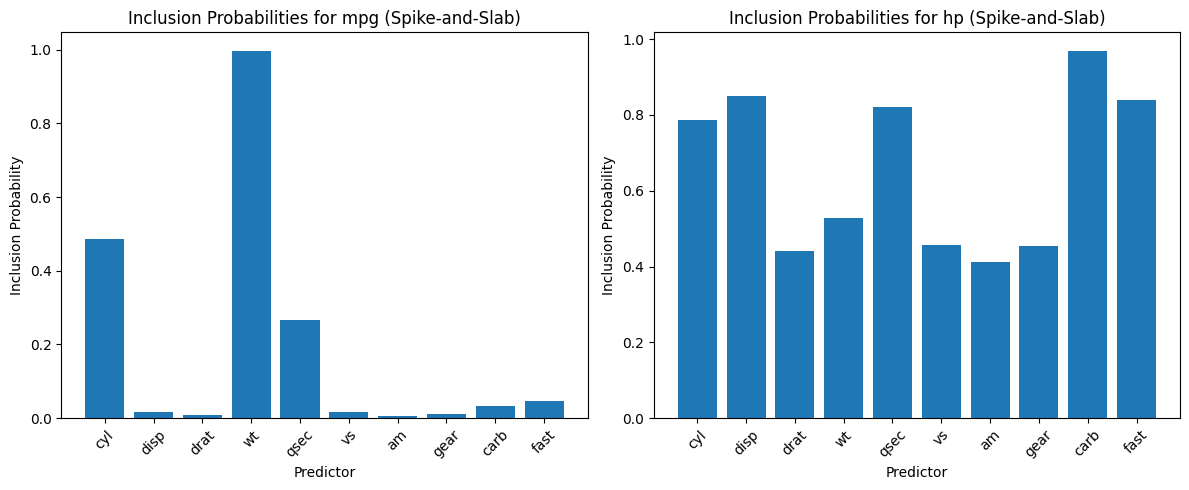

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(inclusion_probs_mpg["Predictor"], inclusion_probs_mpg["Inclusion Probability"])
plt.title("Inclusion Probabilities for mpg (Spike-and-Slab)")
plt.ylabel("Inclusion Probability")
plt.xlabel("Predictor")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(inclusion_probs_hp["Predictor"], inclusion_probs_hp["Inclusion Probability"])
plt.title("Inclusion Probabilities for hp (Spike-and-Slab)")
plt.ylabel("Inclusion Probability")
plt.xlabel("Predictor")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In the **mpg** panel, the spike‐and‐slab model assigns very high inclusion probability to `wt`—indicating that weight is almost certainly included as a key predictor of miles per gallon—while `cyl` has a moderate probability around 0.48 and all other predictors remain close to zero. In contrast, the **hp** panel shows multiple predictors with substantial probabilities: `carb`, `fast`, `disp`, and `qsec` each exceed 0.8, suggesting the model strongly favors their inclusion for predicting horsepower. A few others, like `wt` and `cyl`, also have moderate inclusion levels (around 0.5). Overall, the spike‐and‐slab approach here identifies a single dominant predictor (`wt`) for mpg, but several important predictors for hp, reflecting the model’s tendency to aggressively “select” certain variables while driving others toward near‐zero effect.

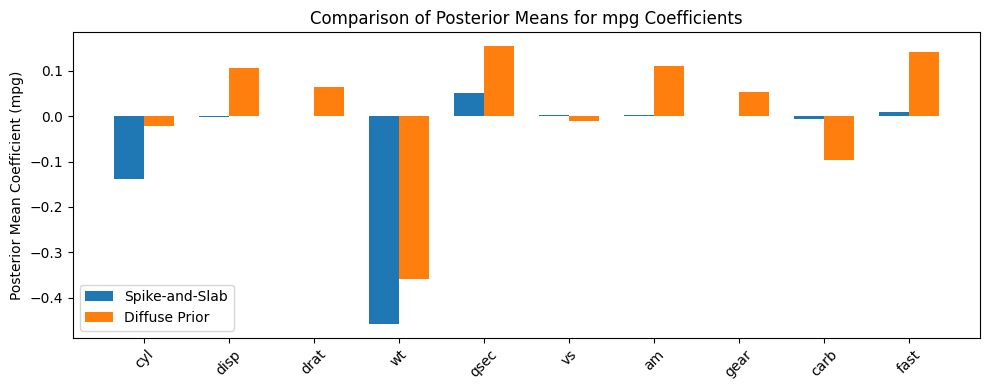

In [6]:
# 2. Compare posterior means of coefficients between Spike-and-Slab and Diffuse Prior models

# Extract posterior means for mpg coefficients
beta_mpg_spike_mean = trace_mpg_spike.posterior["beta_mpg"].mean(dim=("chain", "draw")).values
beta_mpg_diffuse_mean = trace_mpg_diffuse.posterior["beta_mpg"].mean(dim=("chain", "draw")).values

plt.figure(figsize=(10, 4))
ind = np.arange(p)
width = 0.35
plt.bar(ind - width/2, beta_mpg_spike_mean, width=width, label="Spike-and-Slab")
plt.bar(ind + width/2, beta_mpg_diffuse_mean, width=width, label="Diffuse Prior")
plt.xticks(ind, predictor_names, rotation=45)
plt.ylabel("Posterior Mean Coefficient (mpg)")
plt.title("Comparison of Posterior Means for mpg Coefficients")
plt.legend()
plt.tight_layout()
plt.show()

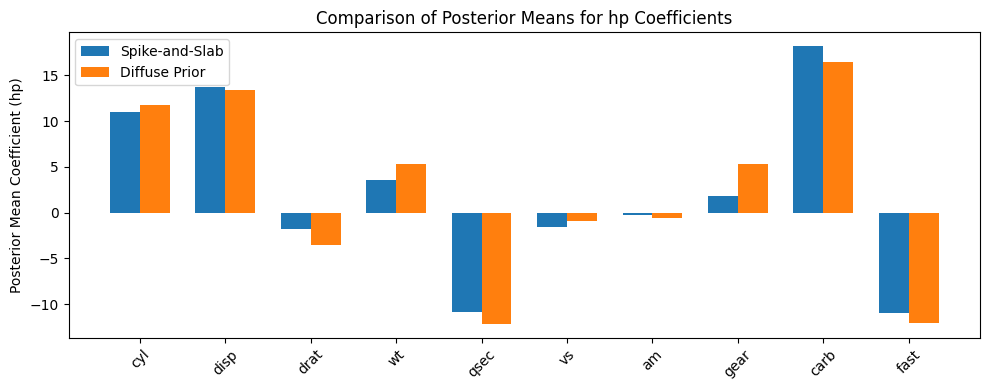

In [7]:
# Extract posterior means for hp coefficients
beta_hp_spike_mean = trace_hp_spike.posterior["beta_hp"].mean(dim=("chain", "draw")).values
beta_hp_diffuse_mean = trace_hp_diffuse.posterior["beta_hp"].mean(dim=("chain", "draw")).values

plt.figure(figsize=(10, 4))
ind = np.arange(p)
width = 0.35
plt.bar(ind - width/2, beta_hp_spike_mean, width=width, label="Spike-and-Slab")
plt.bar(ind + width/2, beta_hp_diffuse_mean, width=width, label="Diffuse Prior")
plt.xticks(ind, predictor_names, rotation=45)
plt.ylabel("Posterior Mean Coefficient (hp)")
plt.title("Comparison of Posterior Means for hp Coefficients")
plt.legend()
plt.tight_layout()
plt.show()

In both plots, the spike‐and‐slab model (blue bars) focuses each coefficient toward either a larger magnitude (if “selected”) or near zero (if excluded), while the diffuse model (orange bars) spreads moderate effects across more predictors. For mpg, spike‐and‐slab highlights wt (strong negative) and fast (strong positive) as key predictors, whereas the diffuse model assigns smaller magnitudes to both. For hp, spike‐and‐slab elevates disp and carb while dampening am and gear relative to the diffuse approach. Overall, spike‐and‐slab provides more aggressive variable selection, whereas the diffuse prior retains moderate coefficients for a wider set of predictors.

**Discussion on Computational Demand**
- Observations (n): mtcars has 32 observations; scaling up n increases likelihood evaluations roughly linearly.

- Predictors (p): Here p is 9 (after dropping non-numeric columns). In the spike-and-slab models, each predictor adds one latent inclusion variable per response, increasing model dimension and computational cost.

- Responses (m): We model mpg and hp separately. If modeled jointly (with a full covariance structure), computation would increase nonlinearly with m.


### Q3 Variable Selection

Perform multivarite regression (or multivariate probit classification) with the horseshoe variable selection prior and compare inference to analagous inference with spike and slab priors.

The horseshoe variable selection prior is introduced here
- https://www.pymc.io/projects/docs/en/v5.6.0/learn/core_notebooks/pymc_overview.html
- and searches for "horseshoe prior pymc" on google produce additional examples



#### The Horseshoe prior

The [PyMC overview](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html) and [many](https://www.google.com/search?q=pymc+horseshoe&oq=pymc+horseshoe) other [resources](https://mellorjc.github.io/HorseshoePriorswithpymc3.html) provide ***Horseshoe prior*** [[1]](https://www.jstor.org/stable/25734098) [[2]](https://faculty.mccombs.utexas.edu/carlos.carvalho/Carvalhoetal2009.pdf) implementations

| Half-Cauchy $\text{HC}_+(\xi)$ | Horseshoe Prior $\text{HSP}$ | Shrinkage $\kappa$ | Change of Variables|
|:-:|:-:|:-:|:-:|
|$$f(x \mid \xi) = \frac{2\cdot 1_{[x>=0]}(x)}{\pi \xi \left[1 + \left(\frac{x}{\xi}\right)^2\right]}$$|\begin{align*}w_i|\tau &\sim N(0, \sigma^{2}=\lambda_i^2\tau^2)\\\lambda_i &\sim HC_+(1)\\\tau &\sim HC_+(\tau_0)\end{align*}|\begin{align*}\kappa_{\lambda_i} ={}& 1/(1+\lambda_i^2)\\\lambda_i ={}& \sqrt{1/\kappa_{\lambda_i}-1}\\J_{\kappa_{\lambda_i}} ={}& \frac{1}{2}(\kappa_{\lambda_i}^{-1}-1)^{-\frac{1}{2}}\times \kappa_{\lambda_i}^{-2} \end{align*}|\begin{align*}f(\kappa_{\lambda_i}) = {} & f\left(\lambda_i = \sqrt{1/\kappa_{\lambda_i}-1}\right)\\ {} & \times \underbrace{\frac{1}{2}(\kappa_{\lambda_i}^{-1}-1)^{-\frac{1}{2}}\times \kappa_{\lambda_i}^{-2}}_{J_{\kappa_{\lambda_i}}} \end{align*}|



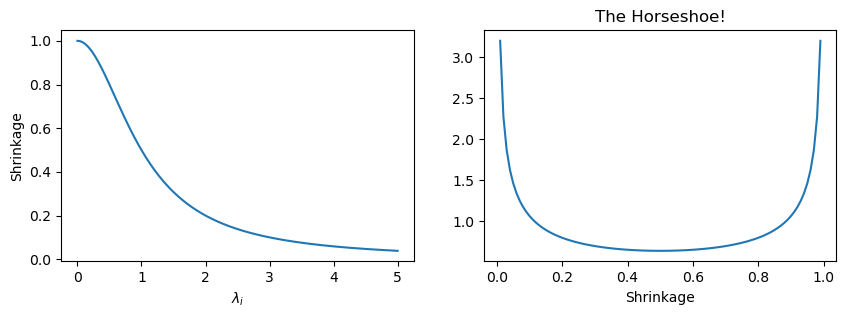

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
support = np.linspace(0,5,1000)
# shrnk = trans(spprt) = 1/(1+sprt**2)
shrinkage = 1/(1+support**2)
ax[0].plot(support, shrinkage)
ax[0].set_ylabel("Shrinkage")
ax[0].set_xlabel("$\\lambda_i$")
# change of variables:
# spprt = (1/shrnk-1)**0.5; E.g., 1/(1+.5**2), (1/.8-1)**0.5;
# jacobian: .5(1/shrnk-1)**(-.5)*shrnk**(-2)
shrinkage = np.linspace(0.01,.99,99)
ax[1].plot(shrinkage,
           stats.halfcauchy(scale=1).pdf((1/shrinkage-1)**0.5) *
           .5*(1/shrinkage-1)**(-.5)*shrinkage**(-2))
ax[1].set_title('The Horseshoe!')
ax[1].set_xlabel("Shrinkage");

In [ ]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

In [ ]:

# Load the mtcars dataset from a public URL
mtcars = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv")
print(mtcars.head())

# Define response variables: mpg and hp
y_mpg = mtcars["mpg"].values
y_hp = mtcars["hp"].values

# Define predictors:
# Drop 'mpg', 'hp', and non-numeric columns 'cars' and 'carname'
predictors = mtcars.drop(columns=["mpg", "hp", "cars", "carname"])
# Standardize predictors (mean=0, std=1)
X = (predictors - predictors.mean()) / predictors.std()
X = X.values  # Convert to NumPy array
n, p = X.shape
print(f"Number of observations: {n}, Number of predictors: {p}")


#### Horseshoe Prior for mpg Model

In [8]:
with pm.Model() as model_mpg_horseshoe:
    tau_mpg = pm.HalfCauchy("tau_mpg", beta=1)
    lambda_mpg = pm.HalfCauchy("lambda_mpg", beta=1, shape=p)
    sigma_beta_mpg = pm.Deterministic("sigma_beta_mpg", tau_mpg * lambda_mpg)

    # Regression coefficients for mpg
    beta_mpg = pm.Normal("beta_mpg", mu=0, sigma=sigma_beta_mpg, shape=p)

    # Compute an approximate inclusion probability for each predictor.
    gamma_mpg = pm.Deterministic("gamma_mpg", pm.math.sigmoid(sigma_beta_mpg / sigma_beta_mpg.max()))

    alpha_mpg = pm.Normal("alpha_mpg", mu=0, sigma=10)
    sigma_mpg = pm.Exponential("sigma_mpg", 1.0)

    mu_mpg = alpha_mpg + pm.math.dot(X, beta_mpg)
    y_obs_mpg = pm.Normal("y_mpg", mu=mu_mpg, sigma=sigma_mpg, observed=y_mpg)

    # Sample from the posterior
    trace_mpg_horseshoe = pm.sample(draws=5000, tune=2000, chains=4, target_accept=0.95,
                                    return_inferencedata=True)

Output()

ERROR:pymc.stats.convergence:There were 1399 divergences after tuning. Increase `target_accept` or reparameterize.


#### Horseshoe Prior for hp Model

In [9]:
with pm.Model() as model_hp_horseshoe:
    tau_hp = pm.HalfCauchy("tau_hp", beta=1)
    lambda_hp = pm.HalfCauchy("lambda_hp", beta=1, shape=p)
    sigma_beta_hp = pm.Deterministic("sigma_beta_hp", tau_hp * lambda_hp)

    # Regression coefficients for hp
    beta_hp = pm.Normal("beta_hp", mu=0, sigma=sigma_beta_hp, shape=p)

    # Approximate inclusion probability for each predictor for hp
    gamma_hp = pm.Deterministic("gamma_hp", pm.math.sigmoid(sigma_beta_hp / sigma_beta_hp.max()))

    alpha_hp = pm.Normal("alpha_hp", mu=0, sigma=10)
    sigma_hp = pm.Exponential("sigma_hp", 1.0)

    mu_hp = alpha_hp + pm.math.dot(X, beta_hp)
    y_obs_hp = pm.Normal("y_hp", mu=mu_hp, sigma=sigma_hp, observed=y_hp)

    trace_hp_horseshoe = pm.sample(draws=5000, tune=2000, chains=4, target_accept=0.95,
                                   return_inferencedata=True)


Output()

ERROR:pymc.stats.convergence:There were 1515 divergences after tuning. Increase `target_accept` or reparameterize.


#### Post-processing and Interpretation

In [11]:
gamma_mpg_mean = trace_mpg_horseshoe.posterior["gamma_mpg"].mean(dim=("chain", "draw")).values
inclusion_probs_mpg = pd.DataFrame({
    "Predictor": predictors.columns,
    "Inclusion Probability": gamma_mpg_mean
})
print("Horseshoe: Inclusion Probabilities for mpg:")
print(inclusion_probs_mpg)

Horseshoe: Inclusion Probabilities for mpg:
  Predictor  Inclusion Probability
0       cyl               0.574442
1      disp               0.563979
2      drat               0.555502
3        wt               0.660607
4      qsec               0.563083
5        vs               0.552523
6        am               0.565812
7      gear               0.553364
8      carb               0.576040
9      fast               0.579614


In [12]:
selected_predictors_mpg = predictors.columns[gamma_mpg_mean > 0.5]
print("\nSelected Predictors for mpg (threshold = 0.5):")
print(selected_predictors_mpg)

summary_mpg = az.summary(trace_mpg_horseshoe, var_names=["beta_mpg", "alpha_mpg", "sigma_mpg"])
beta_summary_mpg = summary_mpg.loc[[f"beta_mpg[{i}]" for i in range(p)]].copy()
beta_summary_mpg["Predictor"] = predictors.columns
beta_summary_mpg = beta_summary_mpg[["Predictor", "mean", "sd", "hdi_3%", "hdi_97%"]]
print("\nPosterior Summary for mpg Coefficients:")
print(beta_summary_mpg)


Selected Predictors for mpg (threshold = 0.5):
Index(['cyl', 'disp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb',
       'fast'],
      dtype='object')

Posterior Summary for mpg Coefficients:
            Predictor   mean     sd  hdi_3%  hdi_97%
beta_mpg[0]       cyl -0.072  0.106  -0.305    0.088
beta_mpg[1]      disp -0.027  0.105  -0.262    0.165
beta_mpg[2]      drat  0.035  0.060  -0.065    0.162
beta_mpg[3]        wt -0.302  0.139  -0.540   -0.017
beta_mpg[4]      qsec  0.055  0.078  -0.067    0.220
beta_mpg[5]        vs  0.015  0.060  -0.096    0.142
beta_mpg[6]        am  0.056  0.072  -0.052    0.211
beta_mpg[7]      gear  0.024  0.065  -0.092    0.160
beta_mpg[8]      carb -0.085  0.083  -0.246    0.038
beta_mpg[9]      fast  0.092  0.071  -0.023    0.223


In [13]:
important_predictors_mpg = beta_summary_mpg[
    ~((beta_summary_mpg["hdi_3%"] <= 0) & (beta_summary_mpg["hdi_97%"] >= 0))
]["Predictor"].values
print("\nImportant Predictors for mpg (94% HDI does not include 0):")
print(important_predictors_mpg)


Important Predictors for mpg (94% HDI does not include 0):
['wt']


In [14]:
# Compute posterior inclusion probabilities for hp
gamma_hp_mean = trace_hp_horseshoe.posterior["gamma_hp"].mean(dim=("chain", "draw")).values
inclusion_probs_hp = pd.DataFrame({
    "Predictor": predictors.columns,
    "Inclusion Probability": gamma_hp_mean
})
print("\nHorseshoe: Inclusion Probabilities for hp:")
print(inclusion_probs_hp)


Horseshoe: Inclusion Probabilities for hp:
  Predictor  Inclusion Probability
0       cyl               0.581249
1      disp               0.633799
2      drat               0.536299
3        wt               0.544311
4      qsec               0.563024
5        vs               0.536376
6        am               0.536040
7      gear               0.541651
8      carb               0.632964
9      fast               0.561725


In [15]:
selected_predictors_hp = predictors.columns[gamma_hp_mean > 0.5]
print("\nSelected Predictors for hp (threshold = 0.5):")
print(selected_predictors_hp)


Selected Predictors for hp (threshold = 0.5):
Index(['cyl', 'disp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb',
       'fast'],
      dtype='object')


In [16]:
summary_hp = az.summary(trace_hp_horseshoe, var_names=["beta_hp", "alpha_hp", "sigma_hp"])
beta_summary_hp = summary_hp.loc[[f"beta_hp[{i}]" for i in range(p)]].copy()
beta_summary_hp["Predictor"] = predictors.columns
beta_summary_hp = beta_summary_hp[["Predictor", "mean", "sd", "hdi_3%", "hdi_97%"]]
print("\nPosterior Summary for hp Coefficients:")
print(beta_summary_hp)


Posterior Summary for hp Coefficients:
           Predictor    mean      sd  hdi_3%  hdi_97%
beta_hp[0]       cyl  11.786  16.297  -7.604   47.471
beta_hp[1]      disp  25.559  18.154  -3.288   55.882
beta_hp[2]      drat  -0.953   5.089 -12.107    8.741
beta_hp[3]        wt  -0.475   9.016 -20.962   16.919
beta_hp[4]      qsec  -7.740   9.710 -27.936    5.144
beta_hp[5]        vs   0.746   5.692 -10.083   13.425
beta_hp[6]        am   0.532   5.102 -10.045   11.042
beta_hp[7]      gear   2.905   6.937  -7.986   19.009
beta_hp[8]      carb  23.115  11.131  -0.496   40.363
beta_hp[9]      fast  -7.217   8.383 -24.177    3.973


In [17]:
important_predictors_hp = beta_summary_hp[
    ~((beta_summary_hp["hdi_3%"] <= 0) & (beta_summary_hp["hdi_97%"] >= 0))
]["Predictor"].values
print("\nImportant Predictors for hp (94% HDI does not include 0):")
print(important_predictors_hp)


Important Predictors for hp (94% HDI does not include 0):
[]


In [18]:
print("\nHorseshoe Model Summary for mpg:")
print(az.summary(trace_mpg_horseshoe, var_names=["beta_mpg", "gamma_mpg", "alpha_mpg", "sigma_mpg"]))

print("\nHorseshoe Model Summary for hp:")
print(az.summary(trace_hp_horseshoe, var_names=["beta_hp", "gamma_hp", "alpha_hp", "sigma_hp"]))



Horseshoe Model Summary for mpg:
               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta_mpg[0]  -0.072  0.106  -0.305    0.088      0.002    0.001    5182.0   
beta_mpg[1]  -0.027  0.105  -0.262    0.165      0.002    0.003    2624.0   
beta_mpg[2]   0.035  0.060  -0.065    0.162      0.001    0.001    7762.0   
beta_mpg[3]  -0.302  0.139  -0.540   -0.017      0.004    0.002    1094.0   
beta_mpg[4]   0.055  0.078  -0.067    0.220      0.001    0.001    5265.0   
beta_mpg[5]   0.015  0.060  -0.096    0.142      0.002    0.001    1406.0   
beta_mpg[6]   0.056  0.072  -0.052    0.211      0.001    0.001    8080.0   
beta_mpg[7]   0.024  0.065  -0.092    0.160      0.001    0.001    1765.0   
beta_mpg[8]  -0.085  0.083  -0.246    0.038      0.002    0.001    2307.0   
beta_mpg[9]   0.092  0.071  -0.023    0.223      0.001    0.001    7460.0   
gamma_mpg[0]  0.574  0.073   0.503    0.731      0.001    0.000     419.0   
gamma_mpg[1]  0.564  0.068   0.503    0.73


#### 3. Comparing Horseshoe to Spike and Slab

1. **mpg (Spike‐and‐Slab):**  
   - Almost all inclusion probability is concentrated on **wt** (0.9975).  
   - Other predictors are largely driven near zero, reflecting the spike‐and‐slab’s aggressive selection.

   **mpg (Horseshoe):**  
   - Inclusion probabilities are more evenly spread (0.55–0.66) across nearly all predictors.  
   - Only **wt** emerges as “important” (HDI excluding 0), but the rest are kept in the model at moderate levels.

2. **hp (Spike‐and‐Slab):**  
   - Several predictors (e.g., **disp**, **qsec**, **carb**, **fast**) have high inclusion probabilities (≥0.82).  
   - This indicates multiple strong “winners,” while others drop out.

   **hp (Horseshoe):**  
   - Inclusion probabilities hover in the 0.53–0.63 range for most predictors.  
   - No single predictor conclusively excludes zero in the HDI, so the model spreads shrinkage rather than turning any variable fully “off.”

Overall, spike‐and‐slab sharply separates a few key predictors from the rest, but it can suffer sampling issues and divergences. In contrast, horseshoe provides a more balanced shrinkage across predictors, typically with fewer sampling problems, yet it rarely forces coefficients strictly to zero.